c:\Users\rlach\anaconda3\envs\PyTorch_env\Lib\site-packages\rasterio\__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


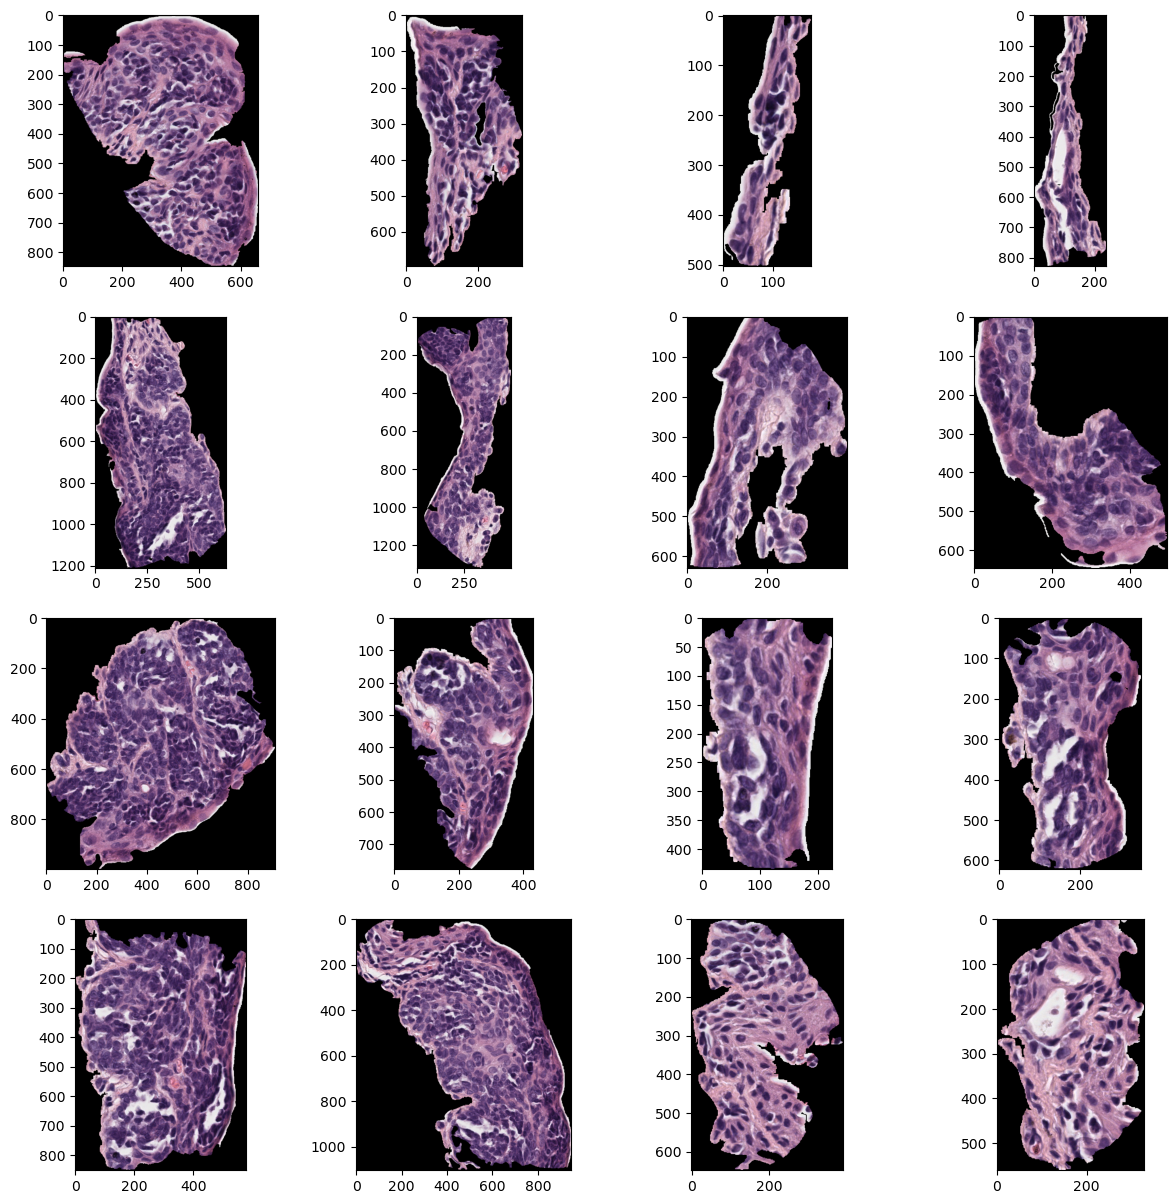

In [1]:

import fiona
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt

with fiona.open("cell_geo_small.geojson", "r") as geojson:
   features = [feature["geometry"] for feature in geojson]

fig, axs = plt.subplots(4, 4, figsize=(15, 15))
axs=axs.flatten()

with rasterio.open("h2114153  h&e_ROI_1 Epithelia.png") as src:
    for i,feature in enumerate(features):
            out_image,_=rasterio.mask.mask(src,[feature],crop=True)
            axs[i].imshow(out_image.transpose((1,2,0)))